In [1]:
import tu_pystream.nedc_pystream as ps
import matplotlib.pyplot as plt
import numpy as np

In [41]:
## load edf
fsamp, sig, labels = ps.nedc_load_edf('tu_pystream/example.edf')
print(fsamp)
print(len(sig))
print(len(sig[0]))
print(labels)
# plt.plot(sig[4])

[250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 1, 1, 1]
30
1250
['EEGFP1-REF', 'EEGFP2-REF', 'EEGF3-REF', 'EEGF4-REF', 'EEGC3-REF', 'EEGC4-REF', 'EEGP3-REF', 'EEGP4-REF', 'EEGO1-REF', 'EEGO2-REF', 'EEGF7-REF', 'EEGF8-REF', 'EEGT3-REF', 'EEGT4-REF', 'EEGT5-REF', 'EEGT6-REF', 'EEGA1-REF', 'EEGA2-REF', 'EEGFZ-REF', 'EEGCZ-REF', 'EEGPZ-REF', 'EEGROC-REF', 'EEGLOC-REF', 'EEGEKG1-REF', 'EEGT1-REF', 'EEGT2-REF', 'PHOTIC-REF', 'IBI', 'BURSTS', 'SUPPR']


In [48]:
### load parameters
params = ps.nedc_load_parameters('tu_pystream/params_04.txt')
print(params.keys())
print(params['montage'])

odict_keys(['channel_selection', 'match_mode', 'montage'])
['0,FP1-F7:EEGFP1-REF--EEGF7-REF', '1,F7-T3:EEGF7-REF--EEGT3-REF', '2,T3-T5:EEGT3-REF--EEGT5-REF', '3,T5-O1:EEGT5-REF--EEGO1-REF', '4,FP2-F8:EEGFP2-REF--EEGF8-REF', '5,F8-T4:EEGF8-REF--EEGT4-REF', '6,T4-T6:EEGT4-REF--EEGT6-REF', '7,T6-O2:EEGT6-REF--EEGO2-REF', '8,A1-T3:EEGA1-REF--EEGT3-REF', '9,T3-C3:EEGT3-REF--EEGC3-REF', '10,C3-CZ:EEGC3-REF--EEGCZ-REF', '11,CZ-C4:EEGCZ-REF--EEGC4-REF', '12,C4-T4:EEGC4-REF--EEGT4-REF', '13,T4-A2:EEGT4-REF--EEGA2-REF', '14,FP1-F3:EEGFP1-REF--EEGF3-REF', '15,F3-C3:EEGF3-REF--EEGC3-REF', '16,C3-P3:EEGC3-REF--EEGP3-REF', '17,P3-O1:EEGP3-REF--EEGO1-REF', '18,FP2-F4:EEGFP2-REF--EEGF4-REF', '19,F4-C4:EEGF4-REF--EEGC4-REF', '20,C4-P4:EEGC4-REF--EEGP4-REF', '21,P4-O2:EEGP4-REF--EEGO2-REF']


In [51]:
# select channels from parameter file
#
fsamp_sel, sig_sel, labels_sel = ps.nedc_select_channels(params, fsamp, sig, labels)
print(fsamp_sel)
print(len(sig_sel))
print(labels_sel)

[250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 1, 1, 1]
30
['EEGFP1-REF', 'EEGFP2-REF', 'EEGF3-REF', 'EEGF4-REF', 'EEGC3-REF', 'EEGC4-REF', 'EEGP3-REF', 'EEGP4-REF', 'EEGO1-REF', 'EEGO2-REF', 'EEGF7-REF', 'EEGF8-REF', 'EEGT3-REF', 'EEGT4-REF', 'EEGT5-REF', 'EEGT6-REF', 'EEGA1-REF', 'EEGA2-REF', 'EEGFZ-REF', 'EEGCZ-REF', 'EEGPZ-REF', 'EEGROC-REF', 'EEGLOC-REF', 'EEGEKG1-REF', 'EEGT1-REF', 'EEGT2-REF', 'PHOTIC-REF', 'IBI', 'BURSTS', 'SUPPR']


In [59]:
# apply a montage
#
fsamp_mont, sig_mont, labels_mont = ps.nedc_apply_montage(params, fsamp_sel, sig_sel, labels_sel)
print(fsamp_mont, len(sig_mont), len(sig_mont[0]), labels_mont)
print(type(sig_mont))

[250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250] 22 1250 ['FP1-F7', 'F7-T3', 'T3-T5', 'T5-O1', 'FP2-F8', 'F8-T4', 'T4-T6', 'T6-O2', 'A1-T3', 'T3-C3', 'C3-CZ', 'CZ-C4', 'C4-T4', 'T4-A2', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2']
<class 'list'>


# Notes
For each edf file, we cannot assume the first channel is always the same physical location of electrode. 
1. Set some standard label and order.
Ideally I can use data.frame, however I will first see what format others used. The order can be arbitrary, but I will see what other used first.
2. Read edf file and its montage, 
This can be done using the aforementioned functions from pystream
3. Convert edf reading to standard format.
This can be done using numpy and panda
4. Chop seizure
Comparing the sampling rate, time and annotated time, we extract some chunks of seizure signal.
5. Chop pre-ictal 
Chop from 10 to 20 seconds preceding seizures.
6. Chop background
10 minutes preceding seizures and 10 minutes after seizures. 

## Prepare dataset and labels

In [1]:
from future import * 
import os
import numpy as np

train_path = '../tusz_1_5_2/edf/train'
tcp_type = '01_tcp_ar'
patient_group = '004'
patient = '00000492'
session = 's003_2003_07_18'
token = '00000492_s003_t001'
token_path = os.path.join(train_path, tcp_type, patient_group, patient, session, token)
fsamp_mont, sig_mont, labels_mont = read_1_token(token_path)

In [7]:
fsamp = int(np.mean(fsamp_mont))
fsamp

400

In [8]:
# Intervals that have been annotated
# 00000492_s003_t001 0.0000 33.1425 bckg 1.0000
# 00000492_s003_t001 33.1425 53.0000 seiz 1.0000
# 00000492_s003_t001 53.0000 184.0000 bckg 1.0000
intvs, labls = load_tse_bi(token_path)

# relabel intervals by assigning pre-seizure stage
# pre-seizure stage is defined as 100 seconds preceding the seizure
intvs, labls = relabel_tse_bi(intvs=intvs, labels=labls, len_pre=100, len_post=300, sec_gap=0)
intvs, labls


([[0.0, 33.1425], [33.1425, 53.0008], [53.0008, 184.0]],
 ['pres', 'seiz', 'post'])

In [19]:
dataset, labels = signal_to_dataset(sig=sig_mont, fsamp=fsamp, intvs=intvs, labels=labls)

In [16]:
np.shape(sig_mont), np.shape(dataset), np.shape(labels)

((73600, 22), (182, 400, 22), (182,))

## Visualize sample EEG traces

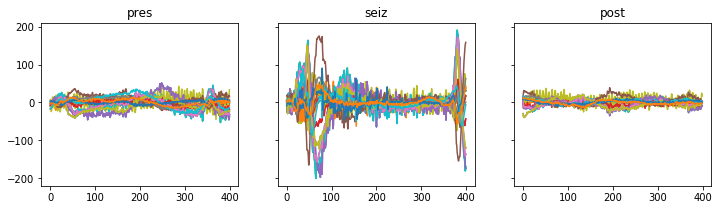

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
sig = pd.DataFrame(dataset[0]).T

_, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,3), sharey=True)

ishows = [28, 40, 80]

for i, ax in enumerate(axes.flat):
    pd.DataFrame(dataset[ishows[i]]).plot(ax=ax, legend=False)
    ax.set_title(labels[ishows[i]])


In [129]:
# Split seizure and bckg into non-overlapping 1 second window
[3]*2 + [4]*3

[3, 3, 4, 4, 4]

In [107]:
pdf = pd.DataFrame({'a': np.arange(1,10), 'b': np.arange(11,20)})
for i in pdf:
    print(i)

a
b


## Try MNE
https://cbrnr.github.io/2017/10/23/loading-eeg-data/


In [44]:
import mne
import os
mne.__version__

'0.20.5'

In [49]:
train_path = '../tusz_1_5_2/edf/train'
tcp_type = '01_tcp_ar'
patient_group = '023'
patient = '00002348'
session = 's008_2015_07_21'
token = '00002348_s008_t000'
token_path = os.path.join(train_path, tcp_type, patient_group, patient, session, token)
raw = mne.io.read_raw_edf(token_path+'.edf', preload=False)

Extracting EDF parameters from /Users/yanxlin/github/ids/tusz_1_5_2/edf/train/01_tcp_ar/023/00002348/s008_2015_07_21/00002348_s008_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [47]:
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-REF, EEG C3-REF, ...
 chs: 29 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2015-07-21 10:26:07 UTC
 nchan: 29
 projs: []
 sfreq: 256.0 Hz
>

AttributeError: module 'tu_pystream.nedc_pystream' has no attribute 'nedc_load_parameters_lbl'

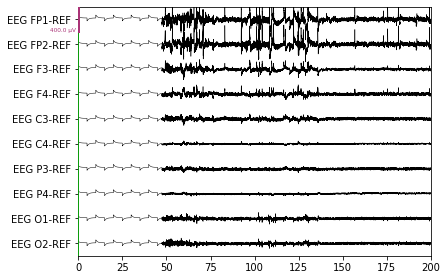

In [48]:
raw.plot(duration=200, n_channels=10, scalings=dict(eeg=20e-5), show_scrollbars=False)
plt.close()

Effective window size : 8.000 (s)


<ipython-input-43-3c2977fd7c5e>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(picks=slice(1,20), tmin=0, tmax=256, fmin=0, fmax=128, n_fft=2048)


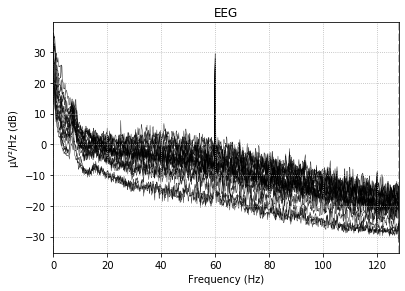

In [43]:
# power spectra density
raw.plot_psd(picks=slice(1,20), tmin=0, tmax=256, fmin=0, fmax=128, n_fft=2048)
plt.close()

Artifacts of ~60 Hz. 

In [58]:
## load edf using highlevel
from pyedflib import highlevel

signals, signal_headers, header = highlevel.read_edf('tu_pystream/example.edf')
print(signal_headers)

[{'label': 'EEG FP1-REF', 'dimension': 'uV', 'sample_rate': 250, 'physical_max': 4999.847, 'physical_min': -4999.84, 'digital_max': 32767, 'digital_min': -32767, 'prefilter': 'HP:0.000 Hz LP:0.0 Hz N:0.0', 'transducer': 'Unknown'}, {'label': 'EEG FP2-REF', 'dimension': 'uV', 'sample_rate': 250, 'physical_max': 4999.847, 'physical_min': -4999.84, 'digital_max': 32767, 'digital_min': -32767, 'prefilter': 'HP:0.000 Hz LP:0.0 Hz N:0.0', 'transducer': 'Unknown'}, {'label': 'EEG F3-REF', 'dimension': 'uV', 'sample_rate': 250, 'physical_max': 4999.847, 'physical_min': -4999.84, 'digital_max': 32767, 'digital_min': -32767, 'prefilter': 'HP:0.000 Hz LP:0.0 Hz N:0.0', 'transducer': 'Unknown'}, {'label': 'EEG F4-REF', 'dimension': 'uV', 'sample_rate': 250, 'physical_max': 4999.847, 'physical_min': -4999.84, 'digital_max': 32767, 'digital_min': -32767, 'prefilter': 'HP:0.000 Hz LP:0.0 Hz N:0.0', 'transducer': 'Unknown'}, {'label': 'EEG C3-REF', 'dimension': 'uV', 'sample_rate': 250, 'physical_max'

/Users/yanxlin/opt/anaconda3/envs/insight/lib/python3.7/site-packages/pyedflib/highlevel.py:369: UserWarning: Not all sampling frequencies are the same ([250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 1, 1, 1]). 
  .format(sfreqs))
